In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart_data = pd.read_csv("input/1processed_cleveland.csv")

In [3]:
n_rows, n_cols = heart_data.shape
print(f"There exists {n_rows} domain instances with {n_cols} features in the dataset.")

There exists 303 domain instances with 14 features in the dataset.


In [4]:
features = list(heart_data.columns)

for feature in range(len(features)):
    print("Column {0} in the dataset is {1}".format(feature+1, features[feature].title()))

Column 1 in the dataset is Age
Column 2 in the dataset is Sex
Column 3 in the dataset is Cp
Column 4 in the dataset is Trestbps
Column 5 in the dataset is Chol
Column 6 in the dataset is Fbs
Column 7 in the dataset is Restecg
Column 8 in the dataset is Thalach
Column 9 in the dataset is Exang
Column 10 in the dataset is Oldpeak
Column 11 in the dataset is Slope
Column 12 in the dataset is Ca
Column 13 in the dataset is Thal
Column 14 in the dataset is Target


In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [6]:
heart_data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [7]:
heart_data[heart_data.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [8]:
heart_data.drop_duplicates(inplace=True)

n_rows, n_cols = heart_data.shape
print(f"After removing duplicate data we now have {n_rows} domain instances.")

After removing duplicate data we now have 303 domain instances.


In [9]:
heart_data.groupby('target').size()

target
0    164
1     55
2     36
3     35
4     13
dtype: int64

In [10]:
not_diseased = len(heart_data[heart_data.target == 0])
potential_diseased = len(heart_data[heart_data.target == 1])
mild_diseased = len(heart_data[heart_data.target == 2])
moderate_diseased = len(heart_data[heart_data.target == 3])
severe_diseased = len(heart_data[heart_data.target == 4])

print(f"tỉ lệ không mắc bệnh là {round((not_diseased/len(heart_data.target)), 2)*100}% , còn tỉ lệ bệnh tim tiềm năng là {round((potential_diseased/len(heart_data.target)), 2)*100}%")
print(f"tỉ lệ suy tim nhẹ là {round((mild_diseased/len(heart_data.target)), 2)*100}%  , còn tỉ lệ suy tim trung bình là {round((moderate_diseased/len(heart_data.target)), 2)*100}%")
print(f"tỉ lệ suy tim nặng là  {round((severe_diseased/len(heart_data.target)), 2)*100}%")

tỉ lệ không mắc bệnh là 54.0% , còn tỉ lệ bệnh tim tiềm năng là 18.0%
tỉ lệ suy tim nhẹ là 12.0%  , còn tỉ lệ suy tim trung bình là 12.0%
tỉ lệ suy tim nặng là  4.0%


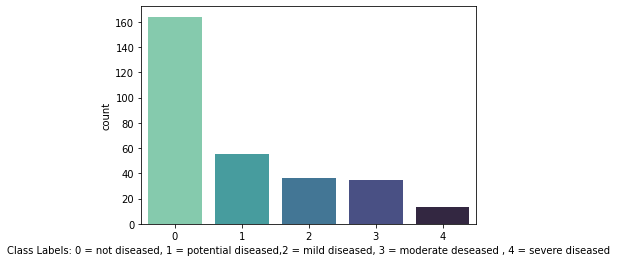

In [12]:
sns.countplot(x='target', data=heart_data, palette='mako_r')
plt.xlabel("Class Labels: 0 = not diseased, 1 = potential diseased,2 = mild diseased, 3 = moderate deseased , 4 = severe diseased") 
plt.show()

In [13]:
male_gender = len(heart_data[heart_data.sex == 1])
female_gender = len(heart_data[heart_data.sex == 0])

print("In this dataset there exists {0} male subjects and {1} female subjects which computes to {2}% for males and {3}% for females.".format(male_gender, female_gender, round((male_gender/len(heart_data.sex)), 2)*100, round((female_gender/len(heart_data.sex)), 2)*100))

In this dataset there exists 206 male subjects and 97 female subjects which computes to 68.0% for males and 32.0% for females.


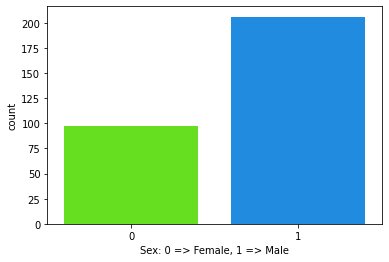

In [14]:
sns.countplot(x='sex', data=heart_data, palette='gist_rainbow')
plt.xlabel("Sex: 0 => Female, 1 => Male")
plt.show()

In [15]:
gender_impact = pd.crosstab(heart_data['sex'], heart_data['target'])
gender_impact

target,0,1,2,3,4
sex,,,,,
0,72,9,7,7,2
1,92,46,29,28,11


target,0,1,2,3,4
sex,,,,,
0,72,9,7,7,2
1,92,46,29,28,11


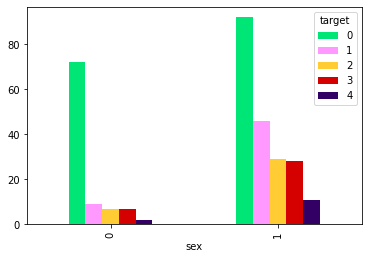

In [16]:
gender_impact.plot(kind='bar', stacked=False, color=['#00e676','#FF99FF','#FFCC33','#d50000','#330066'])
gender_impact

In [17]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.679868,4.732673,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.941935,1.937215,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [18]:
heart_data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.280488,3.792683
1,55.381818,0.836364,3.345455,133.254545,249.109091,0.072727,1.163636,145.927273,0.454545,1.005455,1.636364,0.781818,5.345455
2,58.027778,0.805556,3.750000,134.194444,259.277778,0.250000,0.916667,135.583333,0.611111,1.780556,1.888889,1.222222,6.027778
3,56.000000,0.800000,3.771429,135.457143,246.457143,0.228571,1.285714,132.057143,0.657143,1.962857,1.971429,1.457143,6.285714
4,59.692308,0.846154,3.692308,138.769231,253.384615,0.076923,1.615385,140.615385,0.461538,2.361538,2.076923,1.692308,6.230769


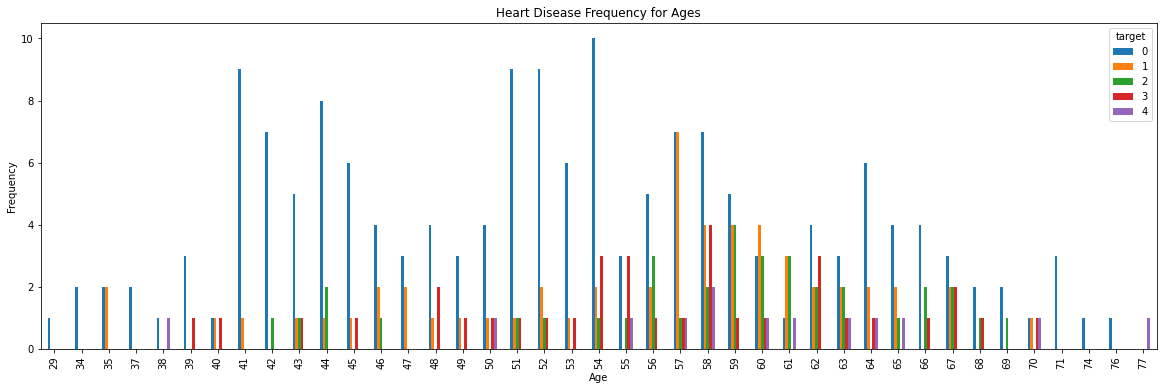

In [19]:
pd.crosstab(heart_data.age,heart_data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

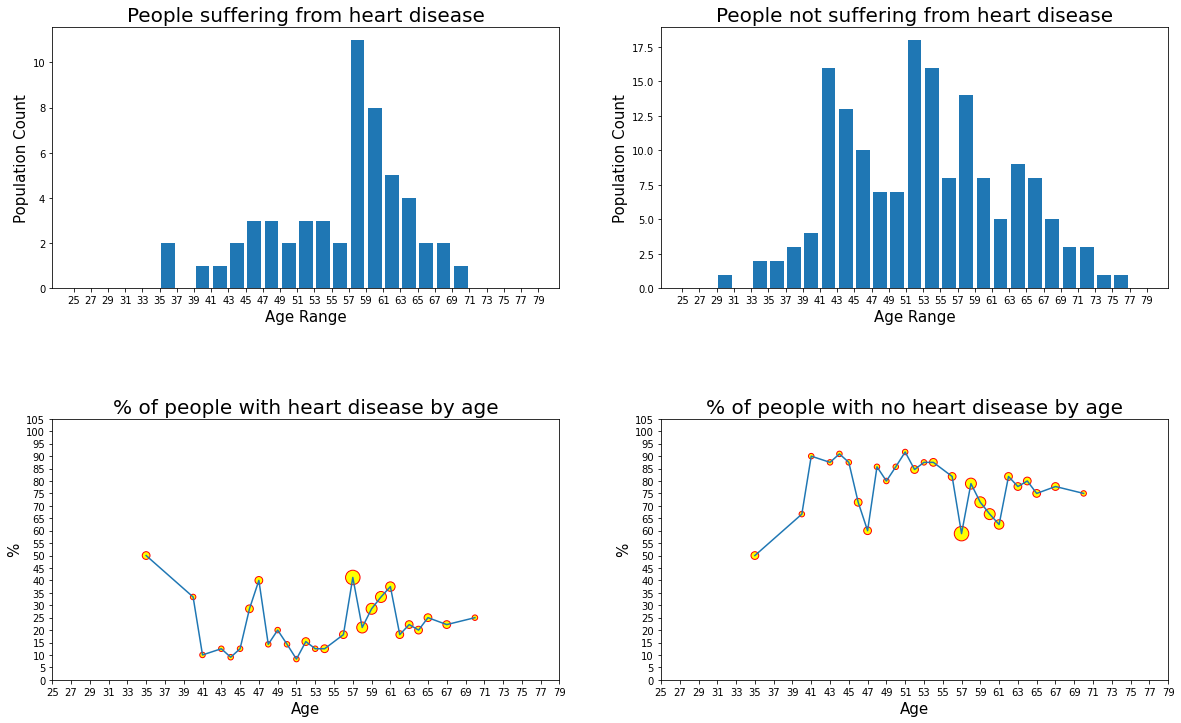

In [30]:
x = heart_data.groupby(['age','target']).agg({'sex':'count'})
y = heart_data.groupby(['age']).agg({'sex':'count'})
z = (x.div(y, level='age') * 100)
q= 100 - z
bin_x = range(25,80,2)

fig, axes = plt.subplots(2,2, figsize = (20,12))
plt.subplots_adjust(hspace = 0.5)

axes[0,0].hist(heart_data[heart_data['target']==1].age.tolist(),bins=bin_x,rwidth=0.8)
axes[0,0].set_xticks(range(25,80,2))
axes[0,0].set_xlabel('Age Range',fontsize=15)
axes[0,0].set_ylabel('Population Count',fontsize=15)
axes[0,0].set_title('People suffering from heart disease',fontsize=20)

axes[0,1].hist(heart_data[heart_data['target']==0].age.tolist(),bins=bin_x,rwidth=0.8)
axes[0,1].set_xticks(range(25,80,2))
axes[0,1].set_xlabel('Age Range',fontsize=15)
axes[0,1].set_ylabel('Population Count',fontsize=15)
axes[0,1].set_title('People not suffering from heart disease',fontsize=20)

axes[1,0].scatter(z.xs(1,level=1).reset_index().age,z.xs(1,level=1).reset_index().sex,s=(x.xs(1,level=1).sex)*30,edgecolors = 'r',c = 'yellow')
axes[1,0].plot(z.xs(1,level=1).reset_index().age,z.xs(1,level=1).reset_index().sex)
axes[1,0].set_xticks(range(25,80,2))
axes[1,0].set_yticks(range(0,110,5))
axes[1,0].set_xlabel('Age',fontsize=15)
axes[1,0].set_ylabel('%',fontsize=15)
axes[1,0].set_title('% of people with heart disease by age',fontsize=20)

axes[1,1].scatter(z.xs(1,level=1).reset_index().age,q.xs(1,level=1).reset_index().sex,s=(x.xs(1,level=1).sex)*30,edgecolors = 'r',c = 'yellow')
axes[1,1].plot(z.xs(1,level=1).reset_index().age,q.xs(1,level=1).reset_index().sex)
axes[1,1].set_xticks(range(25,80,2))
axes[1,1].set_yticks(range(0,110,5))
axes[1,1].set_xlabel('Age',fontsize=15)
axes[1,1].set_ylabel('%',fontsize=15)
axes[1,1].set_title('% of people with no heart disease by age',fontsize=20)

plt.show()

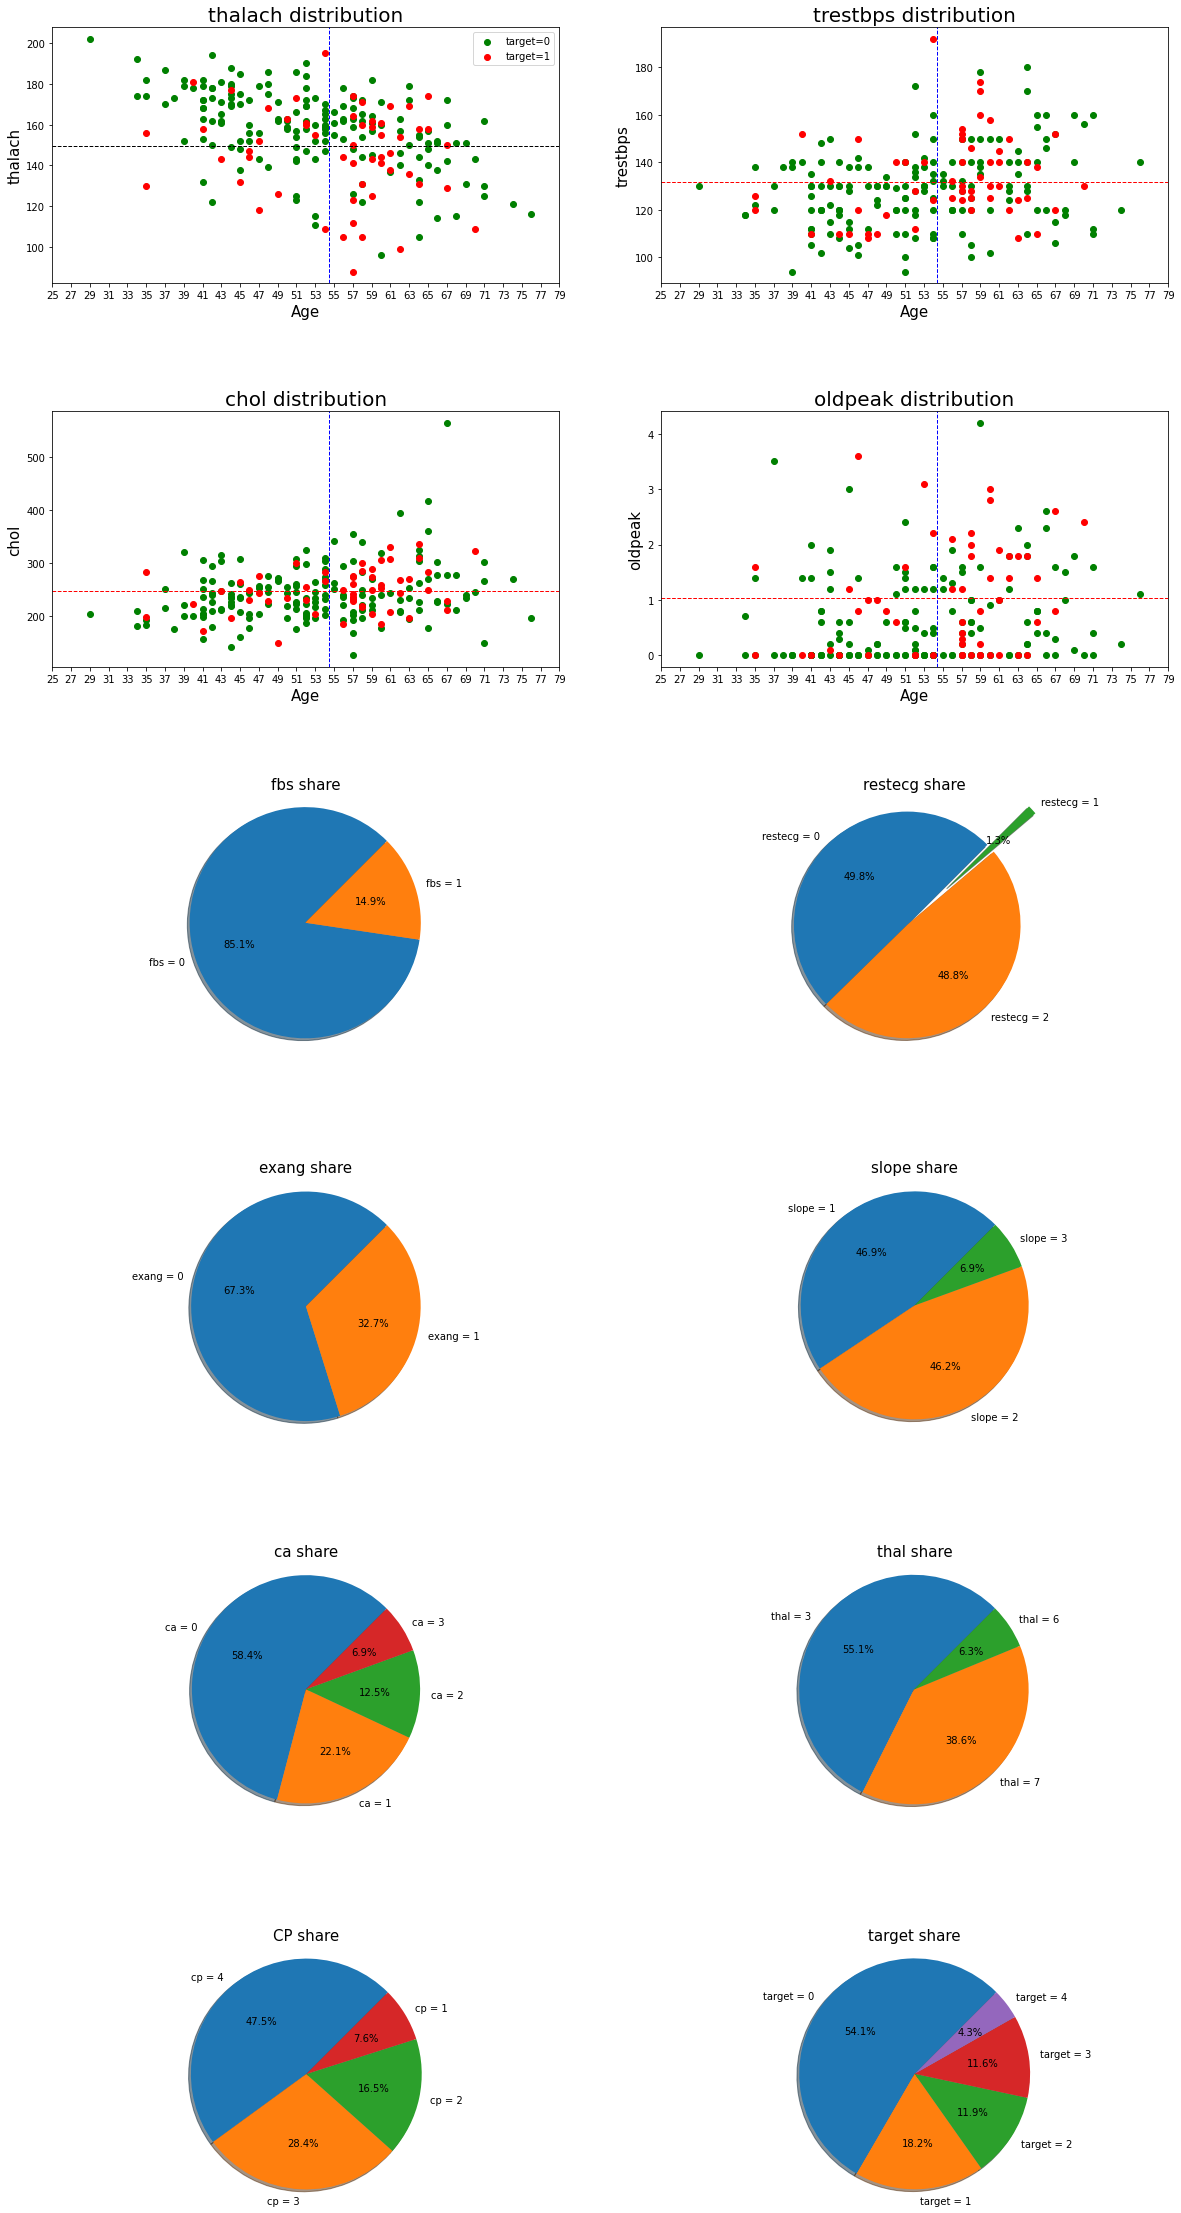

In [45]:
fig, axes = plt.subplots(6,2, figsize = (20,40))
plt.subplots_adjust(hspace = 0.5)

axes[0,0].scatter(heart_data[heart_data['target']==0][['age','thalach']].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','thalach']].sort_values(by = ['age']).thalach, c = 'g',label = 'target=0')
axes[0,0].scatter(heart_data[heart_data['target']==1][['age','thalach']].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','thalach']].sort_values(by = ['age']).thalach, c = 'r',label = 'target=1')
axes[0,0].set_title('thalach distribution',fontsize=20)
axes[0,0].set_xticks(range(25,80,2))
axes[0,0].set_xlabel('Age',fontsize=15)
axes[0,0].set_ylabel('thalach',fontsize=15)
axes[0,0].axhline(np.mean(heart_data['thalach']),xmin=0,xmax=1,linewidth=1, color='black',linestyle = '--')
axes[0,0].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')
axes[0,0].legend()

axes[0,1].scatter(heart_data[heart_data['target']==0][['age','trestbps']].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','trestbps']].sort_values(by = ['age']).trestbps, c = 'g',label = 'target=0')
axes[0,1].scatter(heart_data[heart_data['target']==1][['age','trestbps']].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','trestbps']].sort_values(by = ['age']).trestbps, c = 'r',label = 'target=1')
axes[0,1].set_title('trestbps distribution',fontsize=20)
axes[0,1].set_xticks(range(25,80,2))
axes[0,1].set_xlabel('Age',fontsize=15)
axes[0,1].set_ylabel('trestbps',fontsize=15)
axes[0,1].axhline(np.mean(heart_data['trestbps']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[0,1].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')

# heart_data[heart_data['target']==1][['age','chol',]].sort_values(by = ['age'])
axes[1,0].scatter(heart_data[heart_data['target']==0][['age','chol',]].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','chol',]].sort_values(by = ['age']).chol,c = 'g',label = 'target=0')
axes[1,0].scatter(heart_data[heart_data['target']==1][['age','chol',]].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','chol',]].sort_values(by = ['age']).chol,c = 'r',label = 'target=1')
axes[1,0].set_title('chol distribution',fontsize=20)
axes[1,0].set_xticks(range(25,80,2))
axes[1,0].set_xlabel('Age',fontsize=15)
axes[1,0].set_ylabel('chol',fontsize=15)
axes[1,0].axhline(np.mean(heart_data['chol']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[1,0].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')

axes[1,1].scatter(heart_data[heart_data['target']==0][['age','oldpeak',]].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','oldpeak',]].sort_values(by = ['age']).oldpeak,c = 'g',label = 'target=0')
axes[1,1].scatter(heart_data[heart_data['target']==1][['age','oldpeak',]].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','oldpeak',]].sort_values(by = ['age']).oldpeak,c = 'r',label = 'target=1')
axes[1,1].set_title('oldpeak distribution',fontsize=20)
axes[1,1].set_xticks(range(25,80,2))
axes[1,1].set_xlabel('Age',fontsize=15)
axes[1,1].set_ylabel('oldpeak',fontsize=15)
axes[1,1].axhline(np.mean(heart_data['oldpeak']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[1,1].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')

fbs_count = heart_data['fbs'].value_counts()
labels = [('fbs = '+ str(x)) for x in fbs_count.index]
axes[2,0].pie(fbs_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[2,0].axis('equal')
axes[2,0].set_title('fbs share',fontsize=15)

restecg_count = heart_data['restecg'].value_counts()
labels = [('restecg = '+ str(x)) for x in restecg_count.index]
axes[2,1].pie(restecg_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45,explode = [0,0,0.5])
axes[2,1].axis('equal')
axes[2,1].set_title('restecg share',fontsize=15)

exang_count = heart_data['exang'].value_counts()
labels = [('exang = '+ str(x)) for x in exang_count.index]
axes[3,0].pie(exang_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[3,0].axis('equal')
axes[3,0].set_title('exang share',fontsize=15)

slope_count = heart_data['slope'].value_counts()
labels = [('slope = '+ str(x)) for x in slope_count.index]
axes[3,1].pie(slope_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[3,1].axis('equal')
axes[3,1].set_title('slope share',fontsize=15)

ca_count = heart_data['ca'].value_counts()
labels = [('ca = '+ str(x)) for x in ca_count.index]
axes[4,0].pie(ca_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[4,0].axis('equal')
axes[4,0].set_title('ca share',fontsize=15)

thal_count = heart_data['thal'].value_counts()
labels = [('thal = '+ str(x)) for x in thal_count.index]
axes[4,1].pie(thal_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[4,1].axis('equal')
axes[4,1].set_title('thal share',fontsize=15)

cp_count = heart_data['cp'].value_counts()
labels = [('cp = '+ str(x)) for x in cp_count.index]
axes[5,0].pie(cp_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[5,0].axis('equal')
axes[5,0].set_title('CP share',fontsize=15)

target_count = heart_data['target'].value_counts()
labels = [('target = '+ str(x)) for x in target_count.index]
axes[5,1].pie(target_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[5,1].axis('equal')
axes[5,1].set_title('target share',fontsize=15)

plt.show()

In [46]:
correlations = heart_data.corr()
pd.DataFrame(correlations['target']).sort_values(by='target', ascending=False)

,target
target,1.000000
ca,0.511961
thal,0.511896
oldpeak,0.504092
cp,0.407075
exang,0.397057
slope,0.377957
sex,0.224469
age,0.222853
restecg,0.183696


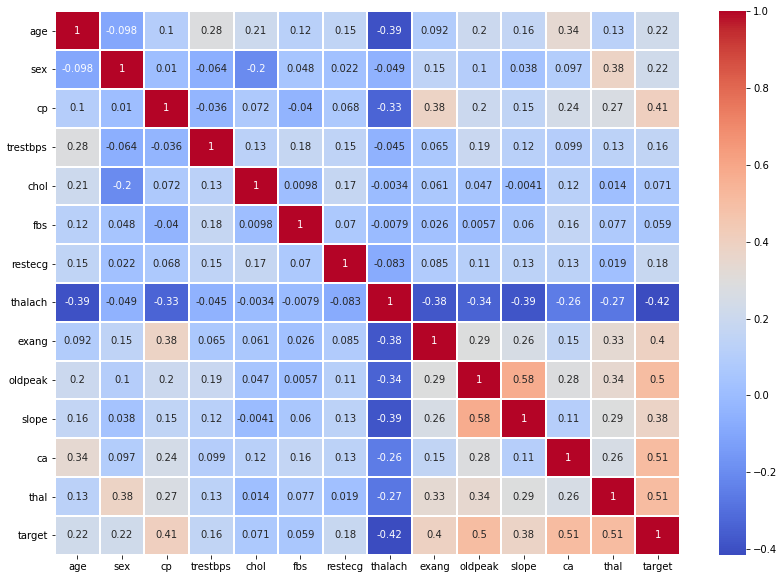

In [47]:
plt.figure(figsize=(14,10))
sns.heatmap(heart_data.corr(), linewidths=.01, annot = True, cmap='coolwarm')
plt.show()

Accuracy  55.26315789473685


c:\users\trung\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


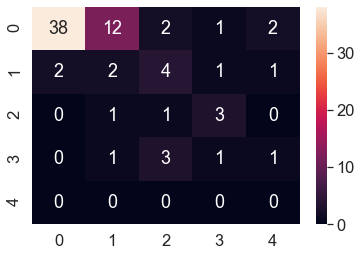

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X = heart_data.iloc[:, :-1]
y = heart_data.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# Model
heart_model = LogisticRegression()
heart_model.fit(X_train, y_train)

# Making predictions
predictions = heart_model.predict(X_test)

# Checking the Accuracy of predictions
print("Accuracy ", heart_model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(predictions, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [49]:
print(heart_model.predict([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]))

[0]


In [50]:
print(heart_model.predict([[65, 1, 0, 135, 254, 0, 0, 127, 0, 2.8, 1, 1, 3]]))

[0]


Accuracy  55.26315789473685


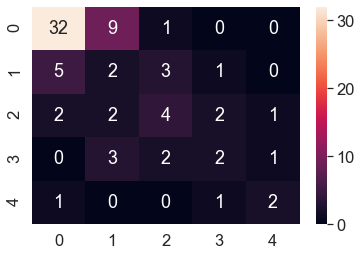

In [51]:
# Model using decision trees
heart_model_dt = DecisionTreeClassifier()

#fiting the model
heart_model_dt.fit(X_train, y_train)

#prediction
dt_predictions = heart_model_dt.predict(X_test)

#Accuracy
print("Accuracy ", heart_model_dt.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(dt_predictions, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [52]:
print(heart_model_dt.predict([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]))

[2]


In [53]:
print(heart_model_dt.predict([[65, 1, 0, 135, 254, 0, 0, 127, 0, 2.8, 1, 1, 3]]))

[2]
